# Sinistros de Transito em Rodovias Federais 🚦

José Marques da Costa Bisneto

A estrutura abaixo lista sugestões do que pode conter no seu trabalho.

Apresentação da análise
* Storytelling;
* Insights (padrões que descrevam os elementos da base);
* Descrição do problema;
* Proposta de solução;

Entregáveis
* Relatório com análise exploratória de dados;
  * Descrição das variáveis (Dados faltantes, tipos de dados, informações relacionadas e fontes);
  * Limpeza da base
* Análise Univariada e Multivariada
  * Medidas estatísticas;
  * Comparações;
  * Tendências de crescimento ou queda;
Gráficos

# Panorama Atual — Rodovias Federais 🔴 🟡 🟢

Número total de acidentes, feridos e mortes em 2024

1. Em 2024, foram registrados **73.156** sinistros de trânsito nas rodovias federais brasileiras.

2. Resultaram **84.526** pessoas feridas (leves ou graves).


3. Ocorreram **6.160:** mortes nesses acidentes.


Link : https://noticias.uol.com.br/ultimas-noticias/agencia-brasil/2025/04/17/acidentes-em-rodovias-federais-matam-616-mil-pessoas-em-2024.html

## Comparativo com 2023: tendência de crescimento

1. Há um aumento tanto no número de acidentes quanto de mortes em comparação com 2023.

2. Em particular, as mortes cresceram cerca de 9% em 2024 sobre 2023.

Link : www.uninter.com/noticias/mortes-em-rodovias-brasileiras-crescem-9-em-2024

# Objetivos do Estudo

* [ ] Definir o perfil dos acidentes em rodovias federais brasileiras, considerando tipos de ocorrência, veículos, vítimas e contexto.

* [ ] Identificar fatores de risco que aumentam a frequência e a gravidade dos sinistros.

* [ ] Apontar medidas preventivas capazes de reduzir acidentes e mortes, contribuindo para políticas públicas, fiscalização e campanhas educativas.

* [ ] Promover reflexões sociais sobre a importância da segurança viária e da preservação de vidas.

# **IMPORTAÇÃO DAS BASES**

1. SINISTROS DE TRÂNSITO - PRF
    1. Sinistros de Trânsito Agrupados Por Ocorrência
    2. Sinistros de Trânsito Agrupados Por Pessoa
2. Feriados Nacionais (biblioteca holidays do Python)

In [60]:
import pandas as pd
import holidays

#Sinistros de Trânsito Agrupados Por Ocorrência
df_ocorrencias = pd.read_csv("DataTran/datatran2025/datatran2025.csv", sep=";", encoding="latin1", low_memory=False)

#Sinistros de Trânsito Agrupados Por Pessoa
df_envolvidos = pd.read_csv("Acidentes/acidentes2025/acidentes2025.csv", sep=";", encoding="latin1", low_memory=False)

#Feriados no ano de 2025
feriados = holidays.Brazil(years=2025)


In [61]:
df_ocorrencias.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,652493,2025-01-01,quarta-feira,06:20:00,SP,116,225,GUARULHOS,Reação tardia ou ineficiente do condutor,Tombamento,...,0,0,1,1,2,"-23,48586772","-46,54075317",SPRF-SP,DEL01-SP,UOP01-DEL01-SP
1,652519,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,Colisão frontal,...,0,1,4,1,6,"-7,812288","-39,08333306",SPRF-CE,DEL05-CE,UOP03-DEL05-CE
2,652522,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,2,0,3,2,"-23,182565","-50,637228",SPRF-PR,DEL07-PR,UOP05-DEL07-PR
3,652544,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,0,4,0,1,2,"-25,36517687","-49,04223028",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
4,652549,2025-01-01,quarta-feira,09:30:00,MG,251,471,FRANCISCO SA,Velocidade Incompatível,Colisão frontal,...,1,1,2,2,4,"-16,46801304","-43,43121303",SPRF-MG,DEL12-MG,UOP01-DEL12-MG


In [6]:
df_envolvidos.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,652493,1467686,2025-01-01,quarta-feira,06:20:00,SP,116,225,GUARULHOS,Reação tardia ou ineficiente do condutor,...,Não Informado,0,0,0,0,"-23,48586772","-46,54075317",SPRF-SP,DEL01-SP,UOP01-DEL01-SP
1,652519,1467833,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,...,Masculino,1,0,0,0,"-7,812288","-39,08333306",SPRF-CE,DEL05-CE,UOP03-DEL05-CE
2,652522,1468042,2025-01-01,quarta-feira,08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,...,Masculino,1,0,0,0,"-23,182565","-50,637228",SPRF-PR,DEL07-PR,UOP05-DEL07-PR
3,652544,1467849,2025-01-01,quarta-feira,11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,...,Masculino,1,0,0,0,"-25,36517687","-49,04223028",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
4,652549,1467791,2025-01-01,quarta-feira,09:30:00,MG,251,471,FRANCISCO SA,Velocidade Incompatível,...,Masculino,1,0,0,0,"-16,46801304","-43,43121303",SPRF-MG,DEL12-MG,UOP01-DEL12-MG


# DESCRIÇÃO DAS BASES

In [7]:
df_ocorrencias.info()
#29 Colunas, Muitos dados do tipo "Object"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40934 entries, 0 to 40933
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      40934 non-null  int64 
 1   data_inversa            40934 non-null  object
 2   dia_semana              40934 non-null  object
 3   horario                 40934 non-null  object
 4   uf                      40934 non-null  object
 5   br                      40934 non-null  int64 
 6   km                      40934 non-null  object
 7   municipio               40934 non-null  object
 8   causa_acidente          40934 non-null  object
 9   tipo_acidente           40934 non-null  object
 10  classificacao_acidente  40933 non-null  object
 11  fase_dia                40934 non-null  object
 12  sentido_via             40934 non-null  object
 13  condicao_metereologica  40934 non-null  object
 14  tipo_pista              40934 non-null  object
 15  tr

In [8]:
df_envolvidos.info()
#34 Colunas, muitos dados do tipo "Object", varias colunas repetidas da base de ocorrencias

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109988 entries, 0 to 109987
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      109988 non-null  int64 
 1   pesid                   109988 non-null  int64 
 2   data_inversa            109988 non-null  object
 3   dia_semana              109988 non-null  object
 4   horario                 109988 non-null  object
 5   uf                      109988 non-null  object
 6   br                      109988 non-null  int64 
 7   km                      109988 non-null  object
 8   municipio               109988 non-null  object
 9   causa_acidente          109988 non-null  object
 10  tipo_acidente           109988 non-null  object
 11  classificacao_acidente  109981 non-null  object
 12  fase_dia                109988 non-null  object
 13  sentido_via             109988 non-null  object
 14  condicao_metereologica  109988 non-n

## 📊 Base de Ocorrencias

* id : Identificação única do acidente.

* data_inversa : Data do acidente em formato americano.

* dia_semana : Dia da semana em que ocorreu.

* horario : Hora do acidente.

* uf : Unidade Federativa (estado).

* br : Número da rodovia federal.

* km : Quilômetro exato do acidente.

* municipio : Cidade do acidente.

* causa_acidente : Causa presumida do acidente.

* tipo_acidente : Tipo de acidente (colisão, atropelamento, tombamento etc.).

* classificacao_acidente : Gravidade do acidente (apenas danos, com feridos, com mortos).

* fase_dia : Período do dia.

* sentido_via : Fluxo da via.

* condicao_metereologica : Condições do tempo no momento do acidente.

* tipo_pista : Tipo de pista (Simples, Dupla ou Multipla).

* tracado_via : Tipo de configuração ou condição da via/trecho de estrada, representa uma ou mais características do trecho, separados por ';'

* uso_solo : Aparentemente indica se um dos veiculos eram usados por apenas uma pessoa.(Muitos dados incosistentes nesta coluna)

* pessoas : Total de pessoas envolvidas no acidente.

* mortos : Total de mortos.

* feridos_leves : Total de feridos leves.

* feridos_graves : Total de feridos graves.

* ilesos : Total de ilesos.

* ignorados : Pessoas com estado de saúde não informado.

* feridos : Total de feridos (leves + graves).

* veiculos : Número de veículos envolvidos.

* latitude / longitude : Localização geográfica.

* regional : Regional da PRF.

* delegacia : Delegacia da PRF.

* uop : Unidade Operacional da PRF.

## 📊 Base de Envolvidos

* id : Identificação única do acidente.

* pesid : Identificação da pessoa envolvida.

* data_inversa : Data do acidente em formato americano (YYYY-MM-DD).

* dia_semana : Dia da semana em que ocorreu o acidente.

* horario : Hora do acidente.

* uf : Unidade Federativa (estado).

* br : Número da rodovia federal.

* km : Quilômetro exato do acidente.

* municipio : Município em que ocorreu o acidente.

* causa_acidente : Causa presumida do acidente (ex.: velocidade, ultrapassagem, pista molhada).

* tipo_acidente : Tipo de acidente (colisão frontal, saída de pista, atropelamento, tombamento etc.).

* classificacao_acidente : Gravidade do acidente (apenas danos, com feridos, com mortos).

* fase_dia : Período do dia em que ocorreu o acidente (manhã, tarde, noite, madrugada).

* sentido_via : Fluxo da via (mão simples, dupla, etc.).

* condicao_metereologica : Condições climáticas no momento do acidente (chuva, neblina, ensolarado etc.).

* tipo_pista : Tipo de pista (simples, dupla, múltipla).

* tracado_via : Configuração ou condição da via/trecho (reta, curva, aclive, declive; pode ter múltiplas características separadas por ';').

* uso_solo : Aparentemente indica se um dos veiculos eram usados por apenas uma pessoa.(Muitos dados incosistentes nesta coluna)

* tipo_veiculo : Categoria do veículo envolvido (carro, caminhão, moto, ônibus).

* marca : Marca do veículo.

* ano_fabricacao_veiculo : Ano de fabricação do veículo.

* tipo_envolvido : Papel da pessoa no acidente (condutor, passageiro, pedestre).

* estado_fisico : Condição da pessoa (ileso, ferido leve, ferido grave, morto).

* idade : Idade da pessoa envolvida.

* sexo : Sexo da pessoa envolvida.

* mortos :  Se pesid foi a óbito.(Usada para soma na base de ocorrencias)

* feridos_leves : Se pesid foi ferido(a) levemente. (Usada para soma na base de ocorrencias)

* feridos_graves : Se pesid foi ferido(a) gravemente.(Usada para soma na base de ocorrencias)

* ilesos : Se pesid saiu ileso(a).(Usada para soma na base de ocorrencias)

* latitude / longitude : Coordenadas geográficas do acidente.

* regional : Regional da PRF responsável pelo registro.

* delegacia : Delegacia da PRF responsável.

* uop : Unidade Operacional da PRF que registrou o acidente.

# **Pré-processamento**



*   Verificando valores Nulos e/ou Invalidos



In [9]:
# VAMOS VERIFICAR VALORES NULOS OU INVALIDOS

df_ocorrencias.isna().sum()[df_ocorrencias.isna().sum() > 0]

# Tem uma linha com 'classificação_acidente' com valor nulo
# Algumas linhas com regional,delegacia e uop nulos

classificacao_acidente     1
regional                   5
delegacia                 18
uop                       24
dtype: int64

In [10]:
df_ocorrencias['classificacao_acidente'].unique()
# VERIFICANDO AS CLASSIFICAÇÕES

array(['Com Vítimas Feridas', nan, 'Com Vítimas Fatais', 'Sem Vítimas'],
      dtype=object)

In [11]:
df_ocorrencias['mortos'][df_ocorrencias['classificacao_acidente'].isna()]
#VERIFICADO QUE HOUVE MORTOS NESSE ACIDENTE ESPECIFICO

1    1
Name: mortos, dtype: int64

In [12]:
df_ocorrencias['classificacao_acidente'] = df_ocorrencias['classificacao_acidente'].fillna('Com Vítimas Fatais')

In [13]:
#PARA NÃO PRECISAR TRATAR AS DEMAIS COLUNAS, PARA CONCENTRAR NAS INFORMAÇÕES DOS ACIDENTES EM SÍ
df_ocorrencias = df_ocorrencias.drop(['regional','delegacia','uop'], axis="columns")

In [14]:
print(df_ocorrencias.dtypes)

id                         int64
data_inversa              object
dia_semana                object
horario                   object
uf                        object
br                         int64
km                        object
municipio                 object
causa_acidente            object
tipo_acidente             object
classificacao_acidente    object
fase_dia                  object
sentido_via               object
condicao_metereologica    object
tipo_pista                object
tracado_via               object
uso_solo                  object
pessoas                    int64
mortos                     int64
feridos_leves              int64
feridos_graves             int64
ilesos                     int64
ignorados                  int64
feridos                    int64
veiculos                   int64
latitude                  object
longitude                 object
dtype: object


In [15]:
#TRATAR ALGUMAS CONVERSÕES DE TEMPO E HORARIO

df_ocorrencias['data_inversa'] = pd.to_datetime(df_ocorrencias['data_inversa'],  format="%Y-%m-%d")
df_ocorrencias['horario'] = pd.to_datetime(df_ocorrencias['horario'], format='%H:%M:%S')

# CONVERTER TODAS AS COLUNAS OBJECT PARA TIPO SRT
for coluna in df_ocorrencias.select_dtypes(include=['object']).columns:
    df_ocorrencias[coluna] = df_ocorrencias[coluna].astype('string')

In [16]:
#VERIFICAR LINHAS DUPLICADAS
df_ocorrencias.duplicated().sum()

0

AGORA NA TABELA ENVOLVIDOS

In [17]:
# VAMOS VERIFICAR VALORES NULOS OU INVALIDOS

df_envolvidos.isna().sum()[df_envolvidos.isna().sum() > 0]

# Tem uma linha com 'classificação_acidente' com valor nulo
# Algumas linhas com regional,delegacia e uop nulos

classificacao_acidente       7
tipo_veiculo              3609
tipo_envolvido            9715
estado_fisico             9715
sexo                      9715
regional                    12
delegacia                   59
uop                         85
dtype: int64

In [18]:
#REMOVER COLUNAS, PARA CONCENTRAR NAS INFORMAÇÕES DOS ACIDENTES EM SÍ
df_envolvidos = df_envolvidos.drop(['regional','delegacia','uop'], axis="columns")

In [19]:
#VERIFICAR OS VALORES NULOS DOS ACIDENTES NÃO CLASSIFICADOS
df_envolvidos[df_envolvidos['classificacao_acidente'].isna()]

#TODAS AS LINHAS SÃO DO MESMO ACIDENTE

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude
1,652519,1467833,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,...,Condutor,Ileso,31,Masculino,1,0,0,0,"-7,812288","-39,08333306"
14284,652519,0,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,...,NaN,NaN,0,NaN,0,0,0,0,"-7,812288","-39,08333306"
14285,652519,0,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,...,NaN,NaN,0,NaN,0,0,0,0,"-7,812288","-39,08333306"
23751,652519,1478721,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,...,Condutor,Não Informado,0,Não Informado,0,0,0,0,"-7,812288","-39,08333306"
23752,652519,1467832,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,...,Passageiro,Óbito,31,Masculino,0,0,0,1,"-7,812288","-39,08333306"
23753,652519,1467829,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,...,Condutor,Lesões Leves,44,Masculino,0,1,0,0,"-7,812288","-39,08333306"
23754,652519,1470998,2025-01-01,quarta-feira,07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,...,Testemunha,Não Informado,0,Não Informado,0,0,0,0,"-7,812288","-39,08333306"


In [20]:
df_envolvidos['classificacao_acidente'] = df_envolvidos['classificacao_acidente'].fillna('Com Vítimas Fatais')

Vamos Deixar somente as Colunas exclusivas do DF_Envolvidos

In [21]:
df_colunas_exclusivas = df_envolvidos.columns.difference(df_ocorrencias.columns)
df_colunas_exclusivas

Index(['ano_fabricacao_veiculo', 'estado_fisico', 'id_veiculo', 'idade',
       'marca', 'pesid', 'sexo', 'tipo_envolvido', 'tipo_veiculo'],
      dtype='object')

In [22]:
df_envolvidos.isna().sum()[df_envolvidos.isna().sum() > 0]

tipo_veiculo      3609
tipo_envolvido    9715
estado_fisico     9715
sexo              9715
dtype: int64

In [23]:
colunas_a_manter = ['id', #FK COM A TABELA DE OCORRENCIAS
                    'ano_fabricacao_veiculo', 'estado_fisico', 'id_veiculo', 'idade','marca', 'pesid', 'sexo', 'tipo_envolvido', 'tipo_veiculo',# COLUNAS EXCLUSIVAS
                    'mortos', 'feridos_leves', 'feridos_graves', 'ilesos'] #COLUNAS QUE INDICAM A SITUAÇÃO DO ENVOLVIDO
df_envolvidos = df_envolvidos[colunas_a_manter]
df_envolvidos

,id,ano_fabricacao_veiculo,estado_fisico,id_veiculo,idade,marca,pesid,sexo,tipo_envolvido,tipo_veiculo,mortos,feridos_leves,feridos_graves,ilesos
0,652493,0,Não Informado,1172970,0,Não Informado/Não Informado,1467686,Não Informado,Condutor,Caminhão,0,0,0,0
1,652519,2021,Ileso,1173068,31,SCANIA/R500 A6X4,1467833,Masculino,Condutor,Caminhão-trator,0,0,0,1
2,652522,1999,Ileso,1173216,60,M.BENZ/L 1620,1468042,Masculino,Condutor,Caminhão,0,0,0,1
3,652544,2013,Ileso,1173088,40,IVECO/VERTIS 90V18,1467849,Masculino,Condutor,Caminhão,0,0,0,1
4,652549,2022,Ileso,1173042,55,VW/28.460 METEOR 6X2,1467791,Masculino,Condutor,Caminhão-trator,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109983,712638,2019,Lesões Graves,1267913,66,HONDA/CG 160 FAN,1588947,Masculino,Condutor,Motocicleta,0,0,1,0
109984,712638,2021,Ileso,1267912,40,CHEV/ONIX PLUS 10TAT PR1,1588946,Masculino,Condutor,Automóvel,0,0,0,1
109985,712659,0,Ileso,1267961,0,GM/CELTA 4P LIFE,1589001,Masculino,Condutor,Automóvel,0,0,0,1
109986,712659,0,Lesões Leves,1267961,0,GM/CELTA 4P LIFE,1589000,Masculino,Passageiro,Automóvel,0,1,0,0


In [24]:
df_envolvidos.head()

,id,ano_fabricacao_veiculo,estado_fisico,id_veiculo,idade,marca,pesid,sexo,tipo_envolvido,tipo_veiculo,mortos,feridos_leves,feridos_graves,ilesos
0,652493,0,Não Informado,1172970,0,Não Informado/Não Informado,1467686,Não Informado,Condutor,Caminhão,0,0,0,0
1,652519,2021,Ileso,1173068,31,SCANIA/R500 A6X4,1467833,Masculino,Condutor,Caminhão-trator,0,0,0,1
2,652522,1999,Ileso,1173216,60,M.BENZ/L 1620,1468042,Masculino,Condutor,Caminhão,0,0,0,1
3,652544,2013,Ileso,1173088,40,IVECO/VERTIS 90V18,1467849,Masculino,Condutor,Caminhão,0,0,0,1
4,652549,2022,Ileso,1173042,55,VW/28.460 METEOR 6X2,1467791,Masculino,Condutor,Caminhão-trator,0,0,0,1


In [25]:
df_envolvidos[df_envolvidos['tipo_envolvido'].isna()]

,id,ano_fabricacao_veiculo,estado_fisico,id_veiculo,idade,marca,pesid,sexo,tipo_envolvido,tipo_veiculo,mortos,feridos_leves,feridos_graves,ilesos
13950,652655,1994,NaN,1173220,0,FIAT/UNO ELECTRONIC,0,NaN,NaN,Automóvel,0,0,0,0
13951,653493,1996,NaN,1176278,0,FORD/PAMPA L,0,NaN,NaN,Caminhonete,0,0,0,0
13952,654274,0,NaN,1176331,0,Não Informado/Não Informado,0,NaN,NaN,Bicicleta,0,0,0,0
13953,655013,2020,NaN,1177647,0,HONDA/POP 110I,0,NaN,NaN,Motocicleta,0,0,0,0
13954,656601,2014,NaN,1181933,0,CHEVROLET/ONIX 1.0MT LT,0,NaN,NaN,Automóvel,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23660,704469,2013,NaN,1251695,0,M.BENZ/ATRON 2729 6X4,0,NaN,NaN,Caminhão,0,0,0,0
23661,706148,2008,NaN,1254944,0,M.BENZ/L 1620,0,NaN,NaN,Caminhão,0,0,0,0
23662,706966,2023,NaN,1256666,0,DAF/XF FTT 530 SSC,0,NaN,NaN,Caminhão-trator,0,0,0,0
23663,706986,2025,NaN,1257785,0,VW/DELIVERY 11.180,0,NaN,NaN,Caminhão,0,0,0,0


AGORA TRATAR ESSES DADOS COM VARIOS VALORES INVALIDOS

In [26]:
pip install pandasql

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26768 sha256=569077dc8d742e9056b721946d5e7bae3e704cbd7d681d7c89958dcf2a25e9f7
  Stored in directory: c:\users\jmcbi\appdata\local\pip\cache\wheels\63\e8\ec\75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql
Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandasql as psql


#QUERY

QuerySQL = "SELECT COUNT(*) FROM df_envolvidos WHERE pesid = 0"
resultado = psql.sqldf(QuerySQL, locals())
resultado.head()

#VERIFICADO QUE O ID VEICULO NÃO É NULO

,COUNT(*)
0,9715


In [28]:
df_envolvidos[df_envolvidos['pesid'] == 0]

,id,ano_fabricacao_veiculo,estado_fisico,id_veiculo,idade,marca,pesid,sexo,tipo_envolvido,tipo_veiculo,mortos,feridos_leves,feridos_graves,ilesos
13950,652655,1994,NaN,1173220,0,FIAT/UNO ELECTRONIC,0,NaN,NaN,Automóvel,0,0,0,0
13951,653493,1996,NaN,1176278,0,FORD/PAMPA L,0,NaN,NaN,Caminhonete,0,0,0,0
13952,654274,0,NaN,1176331,0,Não Informado/Não Informado,0,NaN,NaN,Bicicleta,0,0,0,0
13953,655013,2020,NaN,1177647,0,HONDA/POP 110I,0,NaN,NaN,Motocicleta,0,0,0,0
13954,656601,2014,NaN,1181933,0,CHEVROLET/ONIX 1.0MT LT,0,NaN,NaN,Automóvel,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23660,704469,2013,NaN,1251695,0,M.BENZ/ATRON 2729 6X4,0,NaN,NaN,Caminhão,0,0,0,0
23661,706148,2008,NaN,1254944,0,M.BENZ/L 1620,0,NaN,NaN,Caminhão,0,0,0,0
23662,706966,2023,NaN,1256666,0,DAF/XF FTT 530 SSC,0,NaN,NaN,Caminhão-trator,0,0,0,0
23663,706986,2025,NaN,1257785,0,VW/DELIVERY 11.180,0,NaN,NaN,Caminhão,0,0,0,0


In [29]:
df_envolvidos = df_envolvidos[df_envolvidos['pesid'] != 0]

In [30]:
df_envolvidos.isna().sum()[df_envolvidos.isna().sum() > 0]

tipo_veiculo    3609
dtype: int64

In [31]:
df_envolvidos[df_envolvidos['tipo_veiculo'].isna()]

#OBSERVA OS TIPOS ENVOLVIDOS

,id,ano_fabricacao_veiculo,estado_fisico,id_veiculo,idade,marca,pesid,sexo,tipo_envolvido,tipo_veiculo,mortos,feridos_leves,feridos_graves,ilesos
23668,652468,0,Não Informado,0,0,NA/NA,1467637,Não Informado,Testemunha,NaN,0,0,0,0
23689,652477,0,Não Informado,0,0,NA/NA,1469512,Não Informado,Testemunha,NaN,0,0,0,0
23690,652477,0,Não Informado,0,0,NA/NA,1469511,Não Informado,Testemunha,NaN,0,0,0,0
23696,652481,0,Lesões Graves,0,17,NA/NA,1467660,Masculino,Pedestre,NaN,0,0,1,0
23697,652481,0,Não Informado,0,0,NA/NA,1467661,Não Informado,Testemunha,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109907,711892,0,Não Informado,0,0,NA/NA,1587046,Não Informado,Testemunha,NaN,0,0,0,0
109931,712041,0,Não Informado,0,0,NA/NA,1587423,Não Informado,Testemunha,NaN,0,0,0,0
109932,712041,0,Não Informado,0,0,NA/NA,1587419,Não Informado,Testemunha,NaN,0,0,0,0
109945,712211,0,Não Informado,0,0,NA/NA,1587794,Não Informado,Testemunha,NaN,0,0,0,0


In [32]:
#QUERY

QuerySQL = "SELECT DISTINCT tipo_envolvido FROM df_envolvidos WHERE tipo_veiculo IS NULL "
resultado = psql.sqldf(QuerySQL, locals())
resultado.head()

# QUAIS ESTÃO ENVOLVIDOS DIRETAMENTE NO ACIDENTE ?

,tipo_envolvido
0,Testemunha
1,Pedestre
2,Cavaleiro


In [33]:
df_envolvidos[df_envolvidos['tipo_envolvido'] == "Testemunha"]

,id,ano_fabricacao_veiculo,estado_fisico,id_veiculo,idade,marca,pesid,sexo,tipo_envolvido,tipo_veiculo,mortos,feridos_leves,feridos_graves,ilesos
23668,652468,0,Não Informado,0,0,NA/NA,1467637,Não Informado,Testemunha,NaN,0,0,0,0
23689,652477,0,Não Informado,0,0,NA/NA,1469512,Não Informado,Testemunha,NaN,0,0,0,0
23690,652477,0,Não Informado,0,0,NA/NA,1469511,Não Informado,Testemunha,NaN,0,0,0,0
23697,652481,0,Não Informado,0,0,NA/NA,1467661,Não Informado,Testemunha,NaN,0,0,0,0
23754,652519,0,Não Informado,0,0,NA/NA,1470998,Não Informado,Testemunha,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109897,711802,0,Não Informado,0,0,NA/NA,1586843,Não Informado,Testemunha,NaN,0,0,0,0
109907,711892,0,Não Informado,0,0,NA/NA,1587046,Não Informado,Testemunha,NaN,0,0,0,0
109931,712041,0,Não Informado,0,0,NA/NA,1587423,Não Informado,Testemunha,NaN,0,0,0,0
109932,712041,0,Não Informado,0,0,NA/NA,1587419,Não Informado,Testemunha,NaN,0,0,0,0


In [34]:
df_envolvidos =  df_envolvidos[df_envolvidos['tipo_envolvido'] != "Testemunha"]

In [35]:
df_envolvidos[df_envolvidos['tipo_veiculo'].isna()]

,id,ano_fabricacao_veiculo,estado_fisico,id_veiculo,idade,marca,pesid,sexo,tipo_envolvido,tipo_veiculo,mortos,feridos_leves,feridos_graves,ilesos
23696,652481,0,Lesões Graves,0,17,NA/NA,1467660,Masculino,Pedestre,NaN,0,0,1,0
23750,652518,0,Lesões Leves,0,47,NA/NA,1467745,Masculino,Pedestre,NaN,0,1,0,0
23792,652538,0,Óbito,0,32,NA/NA,1467790,Masculino,Pedestre,NaN,1,0,0,0
23892,652588,0,Óbito,0,0,NA/NA,1468031,Masculino,Pedestre,NaN,1,0,0,0
23895,652589,0,Lesões Graves,0,39,NA/NA,1467884,Masculino,Pedestre,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109721,710221,0,Óbito,0,67,NA/NA,1582897,Feminino,Pedestre,NaN,1,0,0,0
109722,710221,0,Lesões Graves,0,56,NA/NA,1582896,Masculino,Pedestre,NaN,0,0,1,0
109728,710240,0,Lesões Leves,0,57,NA/NA,1582933,Masculino,Pedestre,NaN,0,1,0,0
109750,710448,0,Lesões Leves,0,0,NA/NA,1583536,Masculino,Pedestre,NaN,0,1,0,0


In [36]:
df_envolvidos['tipo_veiculo'] = df_envolvidos['tipo_veiculo'].fillna(df_envolvidos['tipo_envolvido'])

In [37]:
# CONVERTER TODAS AS COLUNAS OBJECT PARA TIPO SRT
for coluna in df_envolvidos.select_dtypes(include=['object']).columns:
    df_envolvidos[coluna] = df_envolvidos[coluna].astype('string')

In [38]:
print(df_envolvidos.dtypes)

id                         int64
ano_fabricacao_veiculo     int64
estado_fisico             string
id_veiculo                 int64
idade                      int64
marca                     string
pesid                      int64
sexo                      string
tipo_envolvido            string
tipo_veiculo              string
mortos                     int64
feridos_leves              int64
feridos_graves             int64
ilesos                     int64
dtype: object


AGORA PARA FINALIZAR, AJUSTAR UMA NOVA TABELA PARA A COLUNA TRAÇADO VIA

In [39]:
# SEPARAR OS TRAÇADOS EM UMA NOVA COLUNA E DEIXANDO O ID DA OCORRENCIA
df_tracado_via = df_ocorrencias[['id', 'tracado_via']].assign(
    tracado_via=df_ocorrencias['tracado_via'].str.split(';')
).explode('tracado_via').assign(
    tracado_via=lambda x: x['tracado_via'].str.strip()
).reset_index(drop=True)

df_tracado_via

,id,tracado_via
0,652493,Reta
1,652493,Declive
2,652519,Reta
3,652522,Reta
4,652522,Aclive
...,...,...
52741,712583,Reta
52742,712620,Reta
52743,712625,Curva
52744,712638,Reta


In [40]:
df_ocorrencias = df_ocorrencias.drop(['tracado_via'], axis="columns")

In [41]:
df_ocorrencias.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
0,652493,2025-01-01,quarta-feira,1900-01-01 06:20:00,SP,116,225,GUARULHOS,Reação tardia ou ineficiente do condutor,Tombamento,...,2,0,1,0,0,1,1,2,"-23,48586772","-46,54075317"
1,652519,2025-01-01,quarta-feira,1900-01-01 07:50:00,CE,116,"546,2",PENAFORTE,Pista esburacada,Colisão frontal,...,6,1,1,0,1,4,1,6,"-7,812288","-39,08333306"
2,652522,2025-01-01,quarta-feira,1900-01-01 08:45:00,PR,369,"88,2",CORNELIO PROCOPIO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,5,0,3,0,2,0,3,2,"-23,182565","-50,637228"
3,652544,2025-01-01,quarta-feira,1900-01-01 11:00:00,PR,116,74,CAMPINA GRANDE DO SUL,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,5,0,1,0,4,0,1,2,"-25,36517687","-49,04223028"
4,652549,2025-01-01,quarta-feira,1900-01-01 09:30:00,MG,251,471,FRANCISCO SA,Velocidade Incompatível,Colisão frontal,...,5,0,1,1,1,2,2,4,"-16,46801304","-43,43121303"


In [42]:
df_tracado_via.head()

,id,tracado_via
0,652493,Reta
1,652493,Declive
2,652519,Reta
3,652522,Reta
4,652522,Aclive


In [43]:
df_envolvidos.head()

,id,ano_fabricacao_veiculo,estado_fisico,id_veiculo,idade,marca,pesid,sexo,tipo_envolvido,tipo_veiculo,mortos,feridos_leves,feridos_graves,ilesos
0,652493,0,Não Informado,1172970,0,Não Informado/Não Informado,1467686,Não Informado,Condutor,Caminhão,0,0,0,0
1,652519,2021,Ileso,1173068,31,SCANIA/R500 A6X4,1467833,Masculino,Condutor,Caminhão-trator,0,0,0,1
2,652522,1999,Ileso,1173216,60,M.BENZ/L 1620,1468042,Masculino,Condutor,Caminhão,0,0,0,1
3,652544,2013,Ileso,1173088,40,IVECO/VERTIS 90V18,1467849,Masculino,Condutor,Caminhão,0,0,0,1
4,652549,2022,Ileso,1173042,55,VW/28.460 METEOR 6X2,1467791,Masculino,Condutor,Caminhão-trator,0,0,0,1


* Carregar e entender os dados: Bases df_ocorrencias e df_envolvidos carregadas com sucesso.
* Identificação de colunas, tipos de dados e valores ausentes. df_envolvidos foca em pessoas/veículos, df_ocorrencias no evento do acidente.

Pré-processamento:
* Tratamento de valores nulos em classificacao_acidente.
* Remoção de colunas não essenciais (regional, delegacia, uop).
* Conversão de data e hora para datetime.
* Remoção de registros com pesid = 0 na base de envolvidos.
* Preenchimento de tipo_veiculo nulo com tipo_envolvido para pedestres/cavaleiros.
* Criação da tabela df_tracado_via para análise individual de características da via.


# Análise das bases

### Frequencia de Acidentes Por Mes

In [44]:
# Criar uma coluna só com mês/ano
df_ocorrencias ['mes_ano'] = df_ocorrencias['data_inversa'].dt.to_period('M')

# Contar acidentes por mês
acidentes_mes = df_ocorrencias.groupby('mes_ano').size().reset_index(name="acidentes")

In [45]:
acidentes_mes

,mes_ano,acidentes
0,2025-01,5525
1,2025-02,5283
2,2025-03,5957
3,2025-04,5781
4,2025-05,6089
5,2025-06,6111
6,2025-07,6188


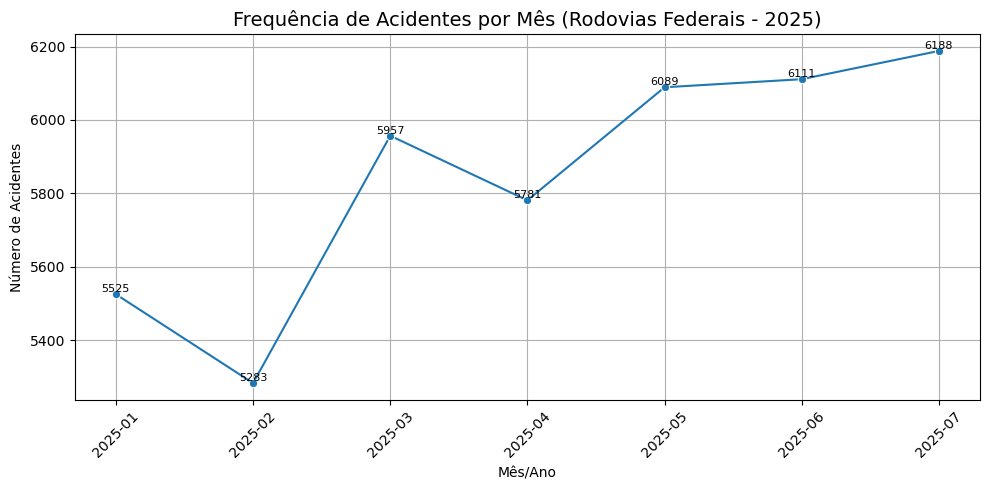

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns


acidentes_mes['mes_ano_str'] = acidentes_mes['mes_ano'].astype(str)

# Gráfico com seaborn
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=acidentes_mes, x="mes_ano_str", y="acidentes", marker="o")
ax.set_title("Frequência de Acidentes por Mês (Rodovias Federais - 2025)", fontsize=14)
ax.set_xlabel("Mês/Ano")
ax.set_ylabel("Número de Acidentes")
plt.xticks(rotation=45)
plt.grid(True)

# Adicionar rótulos nos pontos
for i, row in acidentes_mes.iterrows():
    ax.text(row["mes_ano_str"], row["acidentes"], row["acidentes"],
            ha='center', va='bottom', fontsize=8)


plt.tight_layout()
plt.show()

🔎TEM UMA TENDENCIA DE CRESCIMENTO NOS ULTIMOS MESES

### Frequência de Acidentes por Dia da Semana

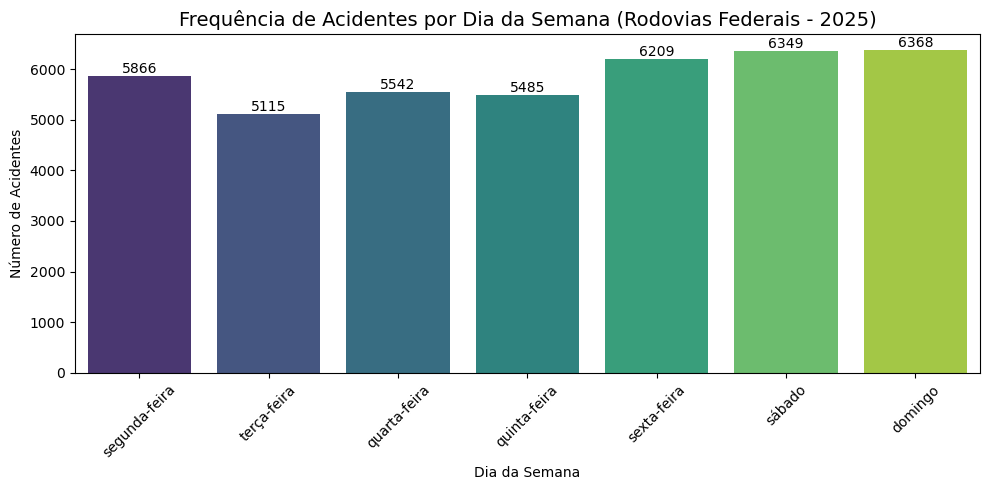

In [47]:
# Contar acidentes por dia da semana
acidentes_dia_semana = df_ocorrencias.groupby('dia_semana').size().reset_index(name="acidentes")

# Define the order of the days of the week
dias_ordenados = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo']
acidentes_dia_semana['dia_semana'] = pd.Categorical(acidentes_dia_semana['dia_semana'], categories=dias_ordenados, ordered=True)

# Sort by day of the week
acidentes_dia_semana = acidentes_dia_semana.sort_values('dia_semana')

# Gráfico de barras com seaborn
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=acidentes_dia_semana, x="dia_semana", y="acidentes", palette="viridis")

# Título e eixos
ax.set_title("Frequência de Acidentes por Dia da Semana (Rodovias Federais - 2025)", fontsize=14)
ax.set_xlabel("Dia da Semana")
ax.set_ylabel("Número de Acidentes")
plt.xticks(rotation=45)

# Adicionar rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

🔎TEM UM LEVE AUMENTO DE CASOS NAS SEXTAS, SÁBADOS E DOMINGOS

### Frequência de Acidentes por Horario

In [48]:
# Converter coluna de horário para datetime (hora:minuto)
df_ocorrencias['horario'] = pd.to_datetime(df_ocorrencias['horario'], format="%H:%M", errors="coerce")

# Extrair apenas a HORA
df_ocorrencias['hora'] = df_ocorrencias['horario'].dt.hour

acidentes_hora = df_ocorrencias['hora'].value_counts().sort_index().reset_index()
acidentes_hora.columns = ['hora', 'acidentes']

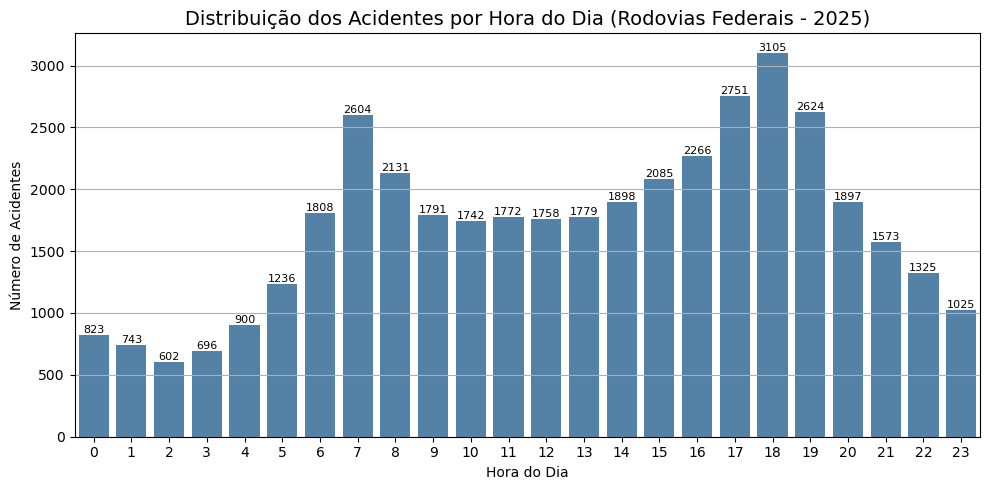

In [49]:
# Gráfico de barras (estilo histograma)
plt.figure(figsize=(10,5))
ax = sns.barplot(data=acidentes_hora, x="hora", y="acidentes", color="steelblue")

# Adicionar rótulos em cima das barras
for i, row in acidentes_hora.iterrows():
    ax.text(row['hora'], row['acidentes'], row['acidentes'],
            ha='center', va='bottom', fontsize=8)

# Ajustes do gráfico
ax.set_title("Distribuição dos Acidentes por Hora do Dia (Rodovias Federais - 2025)", fontsize=14)
ax.set_xlabel("Hora do Dia")
ax.set_ylabel("Número de Acidentes")
plt.xticks(range(0,24))
plt.grid(axis='y')

plt.tight_layout()
plt.show()

🔎TEM UM MAIOR NUMERO DE ACIDENTES EM HORARIOS DE PICO (7H,17H,18,19H)

### Frequencia de Acidentes por Fase do Dia


In [50]:
# Contagem por fase do dia
fase_dia_acidentes = df_ocorrencias['fase_dia'].value_counts().reset_index()
fase_dia_acidentes.columns = ['fase_dia', 'ocorrencias']

AttributeError: 'Rectangle' object has no property 'legend'

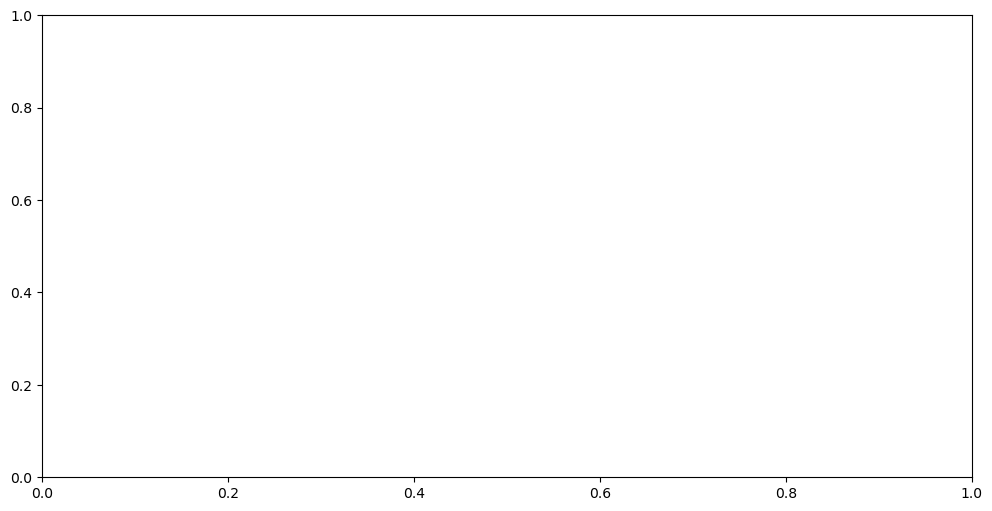

In [51]:
# Gráfico de barras
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=fase_dia_acidentes,
    x='ocorrencias',
    y='fase_dia',
    hue='fase_dia',
    dodge=False,          # mantém uma barra por categoria
    legend=False,         # não mostra legenda repetitiva
    palette="viridis"
)

# Adicionar rótulos de dados
for i, row in fase_dia_acidentes.iterrows():
    ax.text(row['ocorrencias'], i, row['ocorrencias'], ha='left', va='center', fontsize=8)

# Ajustes
ax.set_title("Frequência por Tipo de Acidente (Rodovias Federais - 2025)", fontsize=14)
ax.set_xlabel("Número de Acidentes")
ax.set_ylabel("Tipo de Acidente")

plt.tight_layout()
plt.show()

In [ ]:
🔎A MAIORIA DOS ACIDENTES OCORRE EM PLENA LUZ DO DIA

In [ ]:
import plotly.express as px

# Cria a figura do gráfico de pizza
fig = px.pie(
    data_frame=fase_dia_acidentes,
    names='fase_dia',                   # A coluna com as categorias (fatias da pizza)
    values='ocorrencias',       # A coluna com os valores (tamanho das fatias)
    title='Proporção de Acidentes por Fase do Dia (%)', # Título do gráfico
    hole=0.3                            # Cria um "buraco" no meio, transformando em um gráfico de rosca (donut chart)
)

# Ajusta a aparência dos rótulos para mostrar porcentagem e o nome da categoria
fig.update_traces(
    textposition='inside',              # Posição do texto
    textinfo='percent+label',           # Informação a ser exibida: porcentagem + nome da categoria
    pull=[0.05, 0, 0, 0]                # Puxa (destaca) a primeira fatia um pouco para fora
)

# Ajusta o layout geral do gráfico
fig.update_layout(
    title_font_size=20,                 # Tamanho da fonte do título
    legend_title_text='Fase do Dia',    # Título da legenda
    uniformtext_minsize=12,             # Garante que o texto dentro da pizza seja legível
    uniformtext_mode='hide'
)

fig.show()

### Frequencia de Acidentes Por Tipo de Acidente

In [ ]:
# Contagem por tipo de acidente
acidentes_tipo = df_ocorrencias['tipo_acidente'].value_counts().reset_index()
acidentes_tipo.columns = ['tipo_acidente', 'ocorrencias']

In [ ]:
# Gráfico de barras
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=acidentes_tipo,
    x='ocorrencias',
    y='tipo_acidente',
    hue='tipo_acidente',
    dodge=False,          # mantém uma barra por categoria
    legend=False,         # não mostra legenda repetitiva
    palette="viridis"
)

# Adicionar rótulos de dados
for i, row in acidentes_tipo.iterrows():
    ax.text(row['ocorrencias'], i, row['ocorrencias'], ha='left', va='center', fontsize=8)

# Ajustes
ax.set_title("Frequência por Tipo de Acidente (Rodovias Federais - 2025)", fontsize=14)
ax.set_xlabel("Número de Acidentes")
ax.set_ylabel("Tipo de Acidente")

plt.tight_layout()
plt.show()

In [ ]:
# Calcula o total de ocorrências para o cálculo da porcentagem
total_ocorrencias = df_ocorrencias.shape[0]
acidentes_tipo['percentual'] = (acidentes_tipo['ocorrencias'] / total_ocorrencias) * 100

# Cria uma coluna de texto formatada para exibir no gráfico (ex: "1500 (5.5%)")
acidentes_tipo['texto_formatado'] = acidentes_tipo.apply(
    lambda row: f"{row['ocorrencias']} ({row['percentual']:.1f}%)", axis=1
)

In [ ]:
fig = px.bar(
    data_frame=acidentes_tipo,
    x='ocorrencias',
    y='tipo_acidente',
    orientation='h',  # 'h' para barras horizontais
    text='texto_formatado',  # Usa a coluna de texto formatado para os rótulos
    title='Tipos de Acidente por Frequência (# e %)',
    labels={ # Renomeia os rótulos dos eixos
        'ocorrencias': 'Número de Acidentes',
        'tipo_acidente': 'Tipo de Acidente'
    }
)

# Ajusta a aparência e a posição dos rótulos de texto
fig.update_traces(
    textposition='outside', # Coloca o texto fora da barra
    marker_color='#2ECC71', # Define uma cor para as barras
    textfont_size=12
)

# Ajusta o layout geral do gráfico (título, margens, etc.)
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    yaxis={'categoryorder':'total ascending'} # Garante que a ordem esteja correta
)

fig.show()


🔎 Os de acidentes mais comuns nas rodovias federais até o moemento são "Colisão traseira", "Saída de leito carroçável" e "Colisão transversal".

### Distribuição do número de mortos

In [ ]:
# Contar frequência de cada valor de 'mortos'
frequencias = df_ocorrencias['mortos'].value_counts().sort_index()

plt.figure(figsize=(10,5))
bars = plt.bar(frequencias.index, frequencias.values, color='red')

# Adicionar rótulos de valor em cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, int(height), ha='center', va='bottom')

plt.title("Distribuição do Número de Mortos por Acidente")
plt.xlabel("Mortos por Acidente")
plt.ylabel("Frequência")
plt.xticks(frequencias.index)  # garante que todos os valores apareçam no eixo x
plt.show()

🔍A grande maioria dos acidentes registrados não resultou em mortes,porém ainda existem sinistros com consequências trágicas, e alguns com uma quantidade elevada de mortes.

### Distribuição do Número de Feridos

In [ ]:
# Selecionando as colunas de interesse e somando os valores
colunas = ['feridos_leves', 'feridos_graves', 'ilesos', 'feridos']
soma_colunas = df_ocorrencias[colunas].sum()

In [ ]:
# Criando o gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(x=soma_colunas.index, y=soma_colunas.values, palette="viridis")

# Adicionando rótulos de valor em cada barra
for i, valor in enumerate(soma_colunas.values):
    plt.text(i, valor + 5, int(valor), ha='center', va='bottom')

plt.title("Distribuição de Feridos e Ilesos em Acidentes")
plt.ylabel("Quantidade de Pessoas")
plt.xlabel("Tipo")
plt.show()

In [ ]:
# Selecionando as colunas de interesse e somando os valores
colunas = ['feridos_leves', 'feridos_graves', 'ilesos', 'feridos','mortos']
soma_colunas = df_ocorrencias[colunas].sum()

# Criando o gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(x=soma_colunas.index, y=soma_colunas.values, palette="viridis")

# Adicionando rótulos de valor em cada barra
for i, valor in enumerate(soma_colunas.values):
    plt.text(i, valor + 5, int(valor), ha='center', va='bottom')

plt.title("Distribuição de Feridos e Ilesos e Obitos em Acidentes")
plt.ylabel("Quantidade de Pessoas")
plt.xlabel("Tipo")
plt.show()

🔍 A maioria dos envolvidos saem ilesos ou com ferimentos leves

### Distribuição da Causa do Acidente

In [ ]:
# Contagem por causa
acidentes_causa = df_ocorrencias['causa_acidente'].value_counts().reset_index()
acidentes_causa.columns = ['causa_acidente', 'ocorrencias']
acidentes_causa

#Verificado que tem 69 causas distintas

In [ ]:
# Selecionar top 10 causas
top10_causas = acidentes_causa.sort_values(by='ocorrencias', ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=top10_causas,
    x='ocorrencias',
    y='causa_acidente',
    hue='causa_acidente',
    dodge=False,
    legend=False,
    palette="viridis"
)

# Adicionar rótulos de dados
for i, row in top10_causas.iterrows():
    ax.text(row['ocorrencias'], i, row['ocorrencias'], ha='left', va='center', fontsize=8)

# Ajustes
ax.set_title("Top 10 Causas de Acidente (Rodovias Federais - 2025)", fontsize=14)
ax.set_xlabel("Número de Acidentes")
ax.set_ylabel("Causa do Acidente")

plt.tight_layout()
plt.show()


* 🔍Falha Humana Prevalente: As causas mais comuns, como "Ausência de reação do condutor", "Reação tardia ou ineficiente do condutor" e "Acessar a via sem observar a presença dos outros veículos", indicam que a maioria dos acidentes está ligada a erros de decisão, atenção ou ação dos motoristas.

* 🔍Distância e Velocidade: "Condutor deixou de manter distância do veículo da frente" e "Velocidade Incompatível" também aparecem entre as top 5 causas, reforçando a importância de práticas de direção defensiva.

* 🔍Outras Causas Relevantes: Outras causas no top 10 incluem manobras indevidas ("Ultrapassagem Indevida"), problemas com pedestres ("Entrada inopinada do pedestre") e condições da via ("Pista Escorregadia").

### Distribuição das condições Climaticas no Acidentes

In [ ]:
# Contagem por causa
condicao_metereologica = df_ocorrencias['condicao_metereologica'].value_counts().reset_index()
condicao_metereologica.columns = ['condicao_metereologica', 'ocorrencias']
condicao_metereologica

In [ ]:
# Gráfico de barras
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=condicao_metereologica,
    x='ocorrencias',
    y='condicao_metereologica',
    hue='condicao_metereologica',
    dodge=False,
    legend=False,
    palette="viridis"
)

# Adicionar rótulos de dados
for i, row in condicao_metereologica.iterrows():
    ax.text(row['ocorrencias'], i, row['ocorrencias'], ha='left', va='center', fontsize=8)

# Ajustes
ax.set_title("Distribuição das Condições Climaticas nos Acidentes", fontsize=14)
ax.set_xlabel("Número de Acidentes")
ax.set_ylabel("Causa do Acidente")

plt.tight_layout()
plt.show()

🔍 A grande maioria dos acidentes ocorre em céu claro

### Distribuição dos Acidentes Por UF

In [ ]:
# Contagem por UF
uf = df_ocorrencias['uf'].value_counts().reset_index()
uf.columns = ['uf', 'ocorrencias']
uf

In [ ]:
# Gráfico de barras
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=uf,
    x='ocorrencias',
    y='uf',
    hue='uf',
    dodge=False,
    legend=False,
    palette="viridis"
)

# Adicionar rótulos de dados
for i, row in uf.iterrows():
    ax.text(row['ocorrencias'], i, row['ocorrencias'], ha='left', va='center', fontsize=8)

# Ajustes
ax.set_title("Acidentes po UF", fontsize=14)
ax.set_xlabel("Número de Acidentes")
ax.set_ylabel("Causa do Acidente")

plt.tight_layout()

plt.show()

In [ ]:
import geopandas as gpd
import plotly.express as px
# Carregar mapa do Brasil (shapefile ou GeoJSON)
# Exemplo usando um GeoJSON público:
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
brasil = gpd.read_file(url)

fig = px.choropleth(uf,
                    geojson=url,
                    locations='uf',
                    featureidkey="properties.sigla",
                    color='ocorrencias',
                    color_continuous_scale="Reds",
                    title="Número de Mortos por Estado")

fig.update_geos(fitbounds="locations", visible=False)
fig.show()


🔎 Alguns estados concentram um número significativamente maior de ocorrências.
Estados com Mais Acidentes: O estado de Minas Gerais (MG) lidera o ranking de acidentes, seguido por Santa Catarina (SC), Paraná (PR), Rio de Janeiro (RJ) e Rio Grande do Sul (RS)

### Distribuição dos Acidentes Por Rodovia Federal

In [ ]:
# Contagem por causa
rodovias = df_ocorrencias['br'].value_counts().reset_index()
rodovias.columns = ['br', 'ocorrencias']
rodovias

In [ ]:
# Selecionar top 10 Rodovias
top10_Rodovias = rodovias.sort_values(by='ocorrencias', ascending=False).head(10)  # mudou para 10 para melhor visualização

top10_Rodovias


In [ ]:
top10_Rodovias['br'] = 'BR-'+ top10_Rodovias['br'].astype("string")

In [ ]:
import plotly.express as px

# Supondo que top10_Rodovias já esteja definido
fig = px.bar(
    top10_Rodovias.sort_values('ocorrencias', ascending=True),
    x='ocorrencias',
    y='br',
    orientation='h',          # barras horizontais
    text='ocorrencias',       # mostra os números automaticamente
    color='ocorrencias',      # cores graduais pelo valor
    color_continuous_scale='Viridis',
    title="Top 10 Rodovias Federais com Mais Acidentes (2025)"
)

# Ajustes de layout
fig.update_layout(
    xaxis_title="Número de Acidentes",
    yaxis_title="Rodovia Federal (BR)",
    yaxis=dict(tickmode='linear'),
    height=600,
    width=900
)

# Mostrar gráfico interativo
fig.show()


🔍 O número de acidentes nas top 2 rodovias (BR-101 e BR-116) é consideravelmente maior do que nas demais rodovias listadas no top 10. Isso sugere que essas duas BRs exigem atenção prioritária em termos de segurança viária.

### CLIMA X TIPO DE ACIDENTE


In [ ]:
tabela_cruzada = pd.crosstab(df_ocorrencias['condicao_metereologica'], df_ocorrencias['tipo_acidente'])
print(tabela_cruzada)

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(tabela_cruzada,
            annot=True,   # mostra os números na célula
            fmt='d',      # formato inteiro
            cmap='YlOrRd') # paleta de cores
plt.title('Distribuição de Tipo de Acidente por Clima')
plt.ylabel('Clima')
plt.xlabel('Tipo de Acidente')
plt.show()


🔍 Céu Claro, é dominante mostrando que sob bom tempo, e muitas das causas de acidentes estão relacionadas a fatores humanos e de tráfego, que ocorrem independentemente do clima.

🔍 Condições como neblina ou nevoeiro, embora menos frequentes em termos de acidentes totais, provavelmente mostram uma concentração maior em acidentes que podem ser relacionados à visibilidade reduzida, mas ainda temos muitos fatores humanos relacionados.

### QUANTIDADE DE VEICULOS X MORTES

In [ ]:
# Seleciona as colunas de interesse para o pair plot
# Usamos um número menor de variáveis para não sobrecarregar a visualização
colunas_pairplot = ['mortos', 'veiculos']

# Para não processar o dataset inteiro (pode ser lento), usamos uma amostra
df_amostra = df_ocorrencias[colunas_pairplot].dropna().sample(n=min(2000, len(df_ocorrencias)), random_state=42)
sns.pairplot(df_amostra)
plt.suptitle('Gráfico de Pares de Variáveis Selecionadas', y=1.02, fontsize=16)

# Mostra o gráfico
plt.show()

🔍Não existe uma correlação linear forte e clara entre o número de veículos envolvidos em um acidente e o número de mortos

### CAUSA DE ACIDENTES AGRUPADAS

In [ ]:
# -Definição dos Grupos de Causas ---

falha_humana_condutor = [
    'Velocidade Incompatível', 'Ultrapassagem Indevida', 'Transitar na contramão',
    'Condutor desrespeitou a iluminação vermelha do semáforo', 'Desrespeitar a preferência no cruzamento',
    'Conversão proibida', 'Retorno proibido', 'Manobra de mudança de faixa', 'Transitar no Acostamento',
    'Estacionar ou parar em local proibido', 'Participar de racha', 'Ausência de reação do condutor',
    'Reação tardia ou ineficiente do condutor', 'Condutor deixou de manter distância do veículo da frente',
    'Acessar a via sem observar a presença dos outros veículos', 'Condutor usando celular', 'Condutor Dormindo',
    'Ingestão de álcool pelo condutor', 'Ingestão de substâncias psicoativas pelo condutor', 'Mal súbito do condutor',
    'Transtornos Mentais (exceto suicidio)', 'Suicídio (presumido)', 'Deixar de acionar o farol da motocicleta (ou similar)',
    'Trafegar com motocicleta (ou similar) entre as faixas', 'Frear bruscamente', 'Transitar na calçada', 'Modificação proibida'
]

condicoes_da_via = [
    'Pista Escorregadia', 'Pista esburacada', 'Acumulo de água sobre o pavimento', 'Acumulo de óleo sobre o pavimento',
    'Acumulo de areia ou detritos sobre o pavimento', 'Afundamento ou ondulação no pavimento', 'Ausência de sinalização',
    'Sinalização mal posicionada', 'Sinalização encoberta', 'Deficiência do Sistema de Iluminação/Sinalização',
    'Restrição de visibilidade em curvas horizontais', 'Restrição de visibilidade em curvas verticais',
    'Curva acentuada', 'Declive acentuado', 'Falta de acostamento', 'Acostamento em desnível',
    'Sistema de drenagem ineficiente', 'Demais falhas na via', 'Redutor de velocidade em desacordo',
    'Falta de elemento de contenção que evite a saída do leito carroçável', 'Faixas de trânsito com largura insuficiente',
    'Iluminação deficiente', 'Semáforo com defeito', 'Área urbana sem a presença de local apropriado para a travessia de pedestres',
    'Acesso irregular', 'Desvio temporário'
]

condicoes_ambientais_externas = [
    'Chuva', 'Neblina', 'Fumaça', 'Animais na Pista', 'Objeto estático sobre o leito carroçável',
    'Demais Fenômenos da natureza', 'Carga excessiva e/ou mal acondicionada'
]

falha_mecanica = [
    'Avarias e/ou desgaste excessivo no pneu', 'Problema com o freio', 'Problema na suspensão',
    'Faróis desregulados', 'Demais falhas mecânicas ou elétricas'
]

falha_humana_pedestre = [
    'Entrada inopinada do pedestre', 'Pedestre cruzava a pista fora da faixa', 'Pedestre andava na pista',
    'Pedestre - Ingestão de álcool/ substâncias psicoativas'
]

In [ ]:
# Função para Categorizar as Causas ---
def categorizar_causa(causa):
    if causa in falha_humana_condutor:
        return 'Falha Humana (Condutor)'
    elif causa in condicoes_da_via:
        return 'Condições da Via'
    elif causa in condicoes_ambientais_externas:
        return 'Condições Ambientais/Externas'
    elif causa in falha_mecanica:
        return 'Falha Mecânica'
    elif causa in falha_humana_pedestre:
        return 'Falha Humana (Pedestre)'
    else:
        return 'Outros' # Categoria para causas não listadas

In [ ]:
#CRIAÇÃO DA NOVA CAUSA
df_ocorrencias['grupo_causa'] = df_ocorrencias['causa_acidente'].apply(categorizar_causa)

print("\nContagem de acidentes por grupo de causa:")
print(df_ocorrencias['grupo_causa'].value_counts())

### GRUPO DE CAUSA X CONDIÇÕES METEREOLOGICAS

In [ ]:
# Cria uma tabela de contingência (crosstab)
crosstab_clima = pd.crosstab(df_ocorrencias['grupo_causa'], df_ocorrencias['condicao_metereologica'])

plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_clima, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relação entre Grupo de Causa e Condição Meteorológica', fontsize=16)
plt.ylabel('Grupo de Causa', fontsize=12)
plt.xlabel('Condição Meteorológica', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

🔍 Principais Insights:

* Falha Humana Sob Qualquer Clima: Isso reforça a conclusão anterior de que o comportamento do motorista é um fator dominante nos acidentes, independentemente do clima.
* Condições da Via e Falha Mecânica em Chuva/Neblina: Embora a falha humana seja comum, as categorias "Condições da Via" e "Falha Mecânica" tendem a ter uma proporção maior de ocorrências em condições climáticas adversas como "Chuva" e "Neblina/Nevoeiro". Pista molhada, visibilidade reduzida e problemas nos veículos (como pneus desgastados ou freios) se tornam mais críticos nesses cenários.
* Condições Ambientais Específicas: A categoria "Condições Ambientais/Externas" terá suas ocorrências concentradas, como esperado, sob condições que a definem (por exemplo, "Animais na Pista", "Fumaça", "Vento").
* Falha Humana (Pedestre) e Clima: A frequência de "Falha Humana (Pedestre)" pode não mostrar uma forte dependência do clima, embora possa haver nuances (por exemplo, pedestres podem ter mais dificuldade sob chuva forte ou neblina).

### MATRIZ DE CORRELAÇÃO

In [ ]:
corr_matrix = df_ocorrencias.select_dtypes(include='number').corr()
print(corr_matrix)

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            annot=True,      # mostra os valores
            fmt=".2f",       # 2 casas decimais
            cmap='coolwarm', # paleta de cores
            vmin=-1, vmax=1) # escala de correlação
plt.title('Matriz de Correlação')
plt.show()

🔍 Altas Correlações Esperadas Por Definição

### DADOS ESTATISTICOS GERAIS

In [ ]:
colunas_vitimas = ['mortos', 'feridos_leves', 'feridos_graves', 'feridos', 'ilesos']
df_ocorrencias[colunas_vitimas].describe()

🔍 As estatísticas descritivas (mwJTv2WdR-50) mostram que, em média, o número de mortos e feridos graves por acidente é baixo (próximo de zero ou um). No entanto, os valores máximos ("max") indicam que existem acidentes com um grande número de vítimas (múltiplos mortos e dezenas de feridos), ressaltando a gravidade potencial dos sinistros, mesmo que a maioria não resulte em fatalidades.

In [ ]:
# Número total de acidentes
total_acidentes = len(df_ocorrencias)

# Número de acidentes com pelo menos 1 morto
acidentes_com_morte = (df_ocorrencias['mortos'] > 0).sum()

# Probabilidade empírica
prob_morte = acidentes_com_morte / total_acidentes

print(f"Probabilidade de um acidente ter pelo menos 1 morto: {prob_morte:.2%}")


🔍 Aproximadamente 7.20% dos acidentes registrados nos dados de 2025 resultaram em pelo menos uma morte.

### MEDIA DE ACIDENTES EM FERIADOS

In [ ]:
lista_de_feriados = list(feriados.keys())

df_ocorrencias['data_apenas_data'] = df_ocorrencias['data_inversa'].dt.date

print(lista_de_feriados)

print(f"\nForam encontrados {len(lista_de_feriados)} feriados nacionais em 2025.")

# --- 4. Classificação dos Dias e Análise ---
# Cria uma nova coluna 'tipo_dia' para classificar cada data
df_ocorrencias['tipo_dia'] = df_ocorrencias['data_apenas_data'].apply(lambda data: 'Feriado' if data in lista_de_feriados else 'Dia Comum')

# Conta o número total de acidentes para cada tipo de dia
contagem_acidentes = df_ocorrencias['tipo_dia'].value_counts()

# Calcula o número de dias únicos para cada categoria
dias_feriados = df_ocorrencias[df_ocorrencias['tipo_dia'] == 'Feriado']['data_apenas_data'].nunique()
dias_comuns = df_ocorrencias[df_ocorrencias['tipo_dia'] == 'Dia Comum']['data_apenas_data'].nunique()

# Calcula a média de acidentes por dia para uma comparação justa
media_acidentes_feriados = contagem_acidentes['Feriado'] / dias_feriados if dias_feriados > 0 else 0
media_acidentes_comuns = contagem_acidentes['Dia Comum'] / dias_comuns if dias_comuns > 0 else 0


# --- 5. Exibição dos Resultados ---
print("\n--- Análise do Número de Acidentes: Feriados vs. Dias Comuns ---")

print(f"\nTotal de Acidentes em Feriados: {contagem_acidentes.get('Feriado', 0)}")
print(f"Total de Acidentes em Dias Comuns: {contagem_acidentes.get('Dia Comum', 0)}")

print("\n--- Média de Acidentes por Dia ---")
print(f"Número de dias de feriado analisados: {dias_feriados}")
print(f"Número de dias comuns analisados: {dias_comuns}")
print(f"\nMédia de acidentes por dia em FERIADOS: {media_acidentes_feriados:.2f}")
print(f"Média de acidentes por dia em DIAS COMUNS: {media_acidentes_comuns:.2f}")

In [ ]:
dados_para_grafico = pd.DataFrame({
    'Tipo de Dia': ['Feriados', 'Dias Comuns'],
    'Média de Acidentes': [207.50, 192.81]
})

# Cria a figura do gráfico de barras
fig = px.bar(
    data_frame=dados_para_grafico,
    x='Tipo de Dia',
    y='Média de Acidentes',
    text='Média de Acidentes', # Adiciona o valor como texto em cada barra
    color='Tipo de Dia',      # Colore as barras de acordo com a categoria
    labels={ # Renomeia os rótulos dos eixos e da legenda
        'Média de Acidentes': 'Média de Acidentes por Dia',
        'Tipo de Dia': 'Categoria do Dia'
    },
    title='Média Diária de Acidentes: Feriados vs. Dias Comuns'
)

# Ajusta a aparência dos rótulos de texto e das barras
fig.update_traces(
    texttemplate='%{text:.2f}', # Formata o texto para ter duas casas decimais
    textposition='outside',     # Posiciona o texto fora (acima) da barra
    textfont_size=14
)

# Ajusta o layout geral do gráfico para um visual mais limpo
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    showlegend=False, # Esconde a legenda, pois a informação já está no eixo X
    yaxis=dict(range=[0, 250]) # Define o intervalo do eixo Y para dar espaço ao texto
)

# --- 4. Exibição e Salvamento do Gráfico ---

# Mostra o gráfico interativo
fig.show()



🔎A MEDIA DE ACIDENTES EM DIAS DE FERIADO É MAIOR QUE EM DIAS NORMAIS

### BR-116 e BR-101, Verificação das Ocorrencias por KM

In [ ]:
df_ocorrencias['br'] = df_ocorrencias['br'].astype(int)
df_ocorrencias['km'] = pd.to_numeric(df_ocorrencias['km'], errors='coerce')

# Lista das rodovias que queremos analisar
rodovias_para_analisar = [101, 116]

# Loop para processar cada rodovia na lista
for rodovia in rodovias_para_analisar:
    print(f"\n==============================================================")
    print(f"=== INICIANDO ANÁLISE PARA A BR-{rodovia} ===")
    print(f"==============================================================")

    # Filtra o DataFrame para conter apenas os dados da rodovia atual
    df_rodovia = df_ocorrencias[df_ocorrencias['br'] == rodovia].copy()


    # Arredonda o KM para o inteiro mais próximo para agrupar acidentes
    df_rodovia['km_arredondado'] = df_rodovia['km'].round().astype(int)

    # Conta o número de acidentes em cada KM
    hotspots = df_rodovia['km_arredondado'].value_counts()

    # Pega os 15 KMs com mais ocorrências
    top_15_hotspots = hotspots.nlargest(15).reset_index()
    top_15_hotspots.columns = ['km', 'numero_de_acidentes']
    top_15_hotspots = top_15_hotspots.sort_values(by='numero_de_acidentes', ascending=False)

    print(f"\n--- Top 15 Pontos Críticos para a BR-{rodovia} ---")
    print(top_15_hotspots)

    # --- 5. Visualização com Plotly ---
    print(f"\nGerando gráfico de barras dos pontos críticos para a BR-{rodovia}...")
    fig = px.bar(
        data_frame=top_15_hotspots.sort_values(by='numero_de_acidentes', ascending=True),
        x='numero_de_acidentes',
        y='km',
        orientation='h',
        title=f'Top 15 KMs com Mais Acidentes na BR-{rodovia}',
        labels={
            'numero_de_acidentes': 'Número de Acidentes',
            'km': 'Quilômetro (KM)'
        },
        text='numero_de_acidentes'
    )

    fig.update_layout(
        yaxis={'type': 'category'},
        title_font_size=20,
        height=600 # Ajusta a altura para melhor visualização
    )
    fig.update_traces(textposition='outside', marker_color='crimson')

    # Mostra o gráfico (será exibido um após o outro)
    fig.show()

    # Salva o gráfico em um arquivo HTML único para esta BR
    output_filename = f'hotspots_br_{rodovia}.html'
    fig.write_html(output_filename)
    print(f"Gráfico salvo como '{output_filename}'")

print("\n\n--- Análise concluída para todas as rodovias especificadas. ---")

🔍 Mesmo nas rodovias com mais acidentes, as ocorrências não estão uniformemente distribuídas. Existem trechos curtos que são consideravelmente mais perigosos do que a média da rodovia. Por exemplo, na BR-101, KMs como 70, 69 e 49 aparecem no topo da lista, enquanto na BR-116, KMs como 228, 219 e 225 são os mais críticos nos dados analisados.

### Mapa de Calor do Acidentes

In [ ]:
import folium
from folium.plugins import HeatMap

df_mapa = df_ocorrencias.dropna(subset=['latitude', 'longitude']).copy()


df_mapa['latitude'] = pd.to_numeric(df_mapa['latitude'].str.replace(',', '.'), errors='coerce')
df_mapa['longitude'] = pd.to_numeric(df_mapa['longitude'].str.replace(',', '.'), errors='coerce')


mapa_brasil = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)


dados_heatmap = df_mapa[['latitude', 'longitude']].values.tolist()

HeatMap(dados_heatmap).add_to(mapa_brasil)

mapa_brasil.save('mapa_de_calor_acidentes.html')

print("Mapa de calor gerado e salvo como 'mapa_de_calor_acidentes.html'")

### Analise da Rodovia por Segmento

In [ ]:
brs_para_analisar = [116, 101]

# Definindo o tamanho do segmento
tamanho_segmento = 15

print(f"--- Análise de Frequência de Acidentes por Segmentos de {tamanho_segmento}km ---")

for br in brs_para_analisar:

    df_br = df_ocorrencias[df_ocorrencias['br'] == br].copy()

    # Cria os segmentos de 15km
    # Usamos a divisão inteira para agrupar os KMs.
    # Ex: KM 28 // 15 = 1. Segmento inicial = 1 * 15 = 15.
    df_br['segmento_inicio'] = (df_br['km'] // tamanho_segmento) * tamanho_segmento

    # Agrupa por segmento e conta a frequência de acidentes
    frequencia_segmentos = df_br.groupby('segmento_inicio')['id'].count().reset_index()
    frequencia_segmentos.rename(columns={'id': 'frequencia'}, inplace=True)

    # Cria uma coluna de texto para descrever o segmento
    frequencia_segmentos['segmento_descricao'] = frequencia_segmentos.apply(
        lambda row: f"KM {int(row['segmento_inicio'])} a KM {int(row['segmento_inicio'] + tamanho_segmento - 1)}",
        axis=1
    )

    # Ordena pela frequência para ver os segmentos mais perigosos
    frequencia_segmentos_ordenada = frequencia_segmentos.sort_values(by='frequencia', ascending=False)

    # 6. Exibe o resultado
    print(f"\\n--- Top 15 Segmentos com mais acidentes na BR-{br} ---")

    # Seleciona as colunas para exibição e mostra os 15 primeiros
    tabela_final = frequencia_segmentos_ordenada[['segmento_descricao', 'frequencia']].head(15)
    print(tabela_final.to_string(index=False))

🔍 As BRs 101 e 116 possuem trechos extensos e específicos que são consistentemente perigosos. Isso fornece informações valiosas para ações preventivas e corretivas mais abrangentes nessas rodovias.

# Análise e Insights dos Acidentes de Trânsito em Rodovias Federais (2025)

## Insights Principais por Etapa:

* **Carregar e entender os dados:** Bases `df_ocorrencias` e `df_envolvidos` carregadas com sucesso. Identificação de colunas, tipos de dados e valores ausentes. `df_envolvidos` foca em pessoas/veículos, `df_ocorrencias` no evento do acidente.
* **Pré-processamento:**
  * Tratamento de valores nulos em `classificacao_acidente`.
  * Remoção de colunas não essenciais (`regional`, `delegacia`, `uop`).
  * Conversão de data e hora para `datetime`.
  * Remoção de registros com `pesid = 0` na base de envolvidos.
  * Preenchimento de `tipo_veiculo` nulo com `tipo_envolvido` para pedestres/cavaleiros.
  * Criação da tabela `df_tracado_via` para análise individual de características da via.
  * Categorização das causas de acidentes em grupos simplificados.
* **Análise Univariada:**
  * **Frequência Mensal:** Tendência de crescimento nos acidentes nos últimos meses de 2025 nos dados.
  * **Frequência por Dia da Semana:** Leve aumento de acidentes nas sextas, sábados e domingos.
  * **Frequência por Horário:** Picos de acidentes durante horários de pico de tráfego.
  * **Frequência por Fase do Dia:** Maioria dos acidentes em "Pleno Dia", mas "Plena Noite" também relevante.
  * **Frequência por Tipo de Acidente:** "Colisão traseira", "Saída de leito carroçável" e "Colisão transversal" são os tipos mais comuns.
  * **Distribuição de Mortos e Feridos:** Maioria dos acidentes sem mortos, mas 7.20% têm pelo menos 1 morto. Acidentes geralmente envolvem 1 ferido leve.
  * **Distribuição da Causa de Acidente:** "Falhas Humanas (Condutor)" é a causa mais frequente. Top 10 causas identificadas.
  * **Condições Climáticas:** Maioria dos acidentes sob "Céu Claro".
  * **Frequência por UF e BR:** MG, SC, PR, RJ, RS são os estados com mais acidentes. BR-101 e BR-116 são as rodovias mais críticas.
  * **Distribuição de Idade dos Envolvidos:** Análise da distribuição das idades das pessoas envolvidas nos acidentes.
  * **Frequência por Tipo de Veículo Envolvido:** Identificação dos tipos de veículos mais frequentemente envolvidos em acidentes.
* **Análise Multivariada:**
  * **Clima x Tipo de Acidente:** Heatmap mostra interação, destacando tipos de acidentes mais frequentes sob chuva (saída de leito carroçável, colisão traseira, tombamento).
  * **Veículos x Mortos:** Pair plot não mostra correlação forte.
  * **Grupo de Causa x Condições Meteorológicas:** Reforça falha humana sob todas condições, mas condições ambientais mais presentes sob chuva/neblina.
  * **Matriz de Correlação:** Correlações esperadas entre variáveis de vítimas e veículos, mas sem correlações extremamente altas entre gravidade e número de envolvidos/veículos.
* **Dados Estatísticos:**
  * Análise descritiva: Média baixa de mortos/feridos por acidente, mas máximos indicam acidentes com muitas vítimas.
  * Probabilidade de um acidente ter pelo menos 1 morto: 7.20%.
  * **Feriados vs. Dias Comuns:** Média diária de acidentes maior em feriados (207.50) do que em dias comuns (192.81).
  * **Pontos Críticos por Rodovia (BR-101 e BR-116):** Identificação precisa dos KMs com maior concentração de acidentes.
  * **Mapa de Calor:** Visualização geográfica das áreas com maior densidade de acidentes.
  * **Análise por Segmento de Rodovia:** Identificação de trechos de 15km que concentram muitos acidentes.

In [ ]:
# Gráfico 1: Proporção de Homens x Mulheres
print("Gerando Gráfico 1: Proporção de Gênero...")
sexo_counts = df_envolvidos['sexo'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Gráfico 1: Proporção de Gênero dos Envolvidos em Acidentes')
plt.ylabel('')
plt.savefig('proporcao_sexo.png') # Salva o gráfico como imagem
plt.show()

In [ ]:
media_idade = df_envolvidos['idade'].mean()

fig = px.histogram(
    df_envolvidos,
    x='idade',
    nbins=50, # Você pode ajustar o número de barras
    title='Gráfico 2: Distribuição de Idade dos Envolvidos em Acidentes',
    labels={'idade': 'Idade', 'count': 'Número de Pessoas'},
    marginal='box' # Adiciona um box plot na margem para ver a distribuição
)

# Adicionando a linha da média
fig.add_vline(
    x=media_idade,
    line_dash="dash",
    line_color="red",
    annotation_text=f'Média: {media_idade:.1f} anos'
)

fig.update_layout(bargap=0.1) # Espaçamento entre as barras
fig.show()


In [ ]:
# Gráfico 3: Frequência por Tipo de Veículo com RÓTULOS DE DADOS
print("\\nGerando Gráfico 3 (com Rótulos): Frequência por Tipo de Veículo...")
top_15_veiculos = df_envolvidos['tipo_veiculo'].value_counts().nlargest(15).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(12, 8)) # Criar figura e eixos
top_15_veiculos.plot(kind='barh', color='skyblue', ax=ax)

# --- ADIÇÃO DOS RÓTULOS DE DADOS ---
# Iterar sobre cada barra (patch) no gráfico
for patch in ax.patches:
    # Pega a largura da barra (que é o valor da frequência)
    width = patch.get_width()
    # Pega a posição y da barra
    y = patch.get_y()
    # Pega a altura da barra
    height = patch.get_height()
    # Adiciona o texto no final da barra
    ax.text(width + 5, # Posição x do texto (um pouco à direita da barra)
            y + height / 2, # Posição y do texto (centralizado na altura da barra)
            f'{int(width)}', # O texto a ser exibido (o valor da frequência como inteiro)
            va='center') # Alinhamento vertical

ax.set_title('Gráfico 3: Top 15 Tipos de Veículos Envolvidos em Acidentes')
ax.set_xlabel('Número de Ocorrências')
ax.set_ylabel('Tipo de Veículo')

# Ajustar o limite do eixo x para dar espaço para os rótulos
ax.set_xlim(0, top_15_veiculos.max() * 1.1)

plt.tight_layout()
plt.savefig('frequencia_veiculo_com_rotulos.png')
plt.show()